In [91]:
import os
import matplotlib.pyplot as plt

import rasterio as rio
import cartopy.crs as ccrs

from subprocess import Popen

import pandas as pd


import seaborn as sns

In [61]:
# first class == 1! (1-indexed)
koppen = "/Users/tony/Downloads/Map_KG-Global/KG_1986-2010.grd"
classes = ['Af', 'Am', 'As', 'Aw', 'BSh', 'BSk', 'BWh', 'BWk', 'Cfa', 'Cfb','Cfc', 'Csa', 'Csb', 'Csc', 'Cwa','Cwb', 'Cwc', 'Dfa', 'Dfb', 'Dfc','Dfd', 'Dsa', 'Dsb', 'Dsc', 'Dsd','Dwa', 'Dwb', 'Dwc', 'Dwd', 'EF','ET', 'Ocean']


In [27]:
tuolumne = "/Users/tony/Dropbox/Projects/UW/planet-snowcover/experiments/ASO_Tuolumne/locator-figure/tuolumneboundaryshapefile/tuol-larger.geojson"
# tuolumne = "/Users/tony/Downloads/USCATE_footprints.geojson"
colorado = "/Users/tony/Downloads/co-watershed.geojson"

In [50]:
clip_cmd = "source activate qgis; gdalwarp -dstnodata -9999 -cutline {cutline} -s_srs EPSG:4326 -overwrite -crop_to_cutline {raster} $(dirname {raster})/$(basename {raster} .grd)_{loc}_clip.tif"

In [51]:
cmd = clip_cmd.format(cutline = tuolumne, raster = koppen, loc='tuolumne')
print(cmd)
Popen(cmd, shell=True).communicate()

source activate qgis; gdalwarp -dstnodata -9999 -cutline /Users/tony/Dropbox/Projects/UW/planet-snowcover/experiments/ASO_Tuolumne/locator-figure/tuolumneboundaryshapefile/tuol-larger.geojson -s_srs EPSG:4326 -overwrite -crop_to_cutline /Users/tony/Downloads/Map_KG-Global/KG_1986-2010.grd $(dirname /Users/tony/Downloads/Map_KG-Global/KG_1986-2010.grd)/$(basename /Users/tony/Downloads/Map_KG-Global/KG_1986-2010.grd .grd)_tuolumne_clip.tif


(None, None)

In [52]:
cmd = clip_cmd.format(cutline = colorado, raster = koppen, loc='colorado')
print(cmd)
Popen(cmd, shell=True).communicate()

source activate qgis; gdalwarp -dstnodata -9999 -cutline /Users/tony/Downloads/co-watershed.geojson -s_srs EPSG:4326 -overwrite -crop_to_cutline /Users/tony/Downloads/Map_KG-Global/KG_1986-2010.grd $(dirname /Users/tony/Downloads/Map_KG-Global/KG_1986-2010.grd)/$(basename /Users/tony/Downloads/Map_KG-Global/KG_1986-2010.grd .grd)_colorado_clip.tif


(None, None)

In [53]:
koppen_tuol = rio.open(os.path.join(os.path.dirname(koppen), os.path.splitext(koppen)[0]+"_tuolumne_clip.tif"))
koppen_colo = rio.open(os.path.join(os.path.dirname(koppen), os.path.splitext(koppen)[0]+"_colorado_clip.tif"))


In [54]:
koppen_colo_data = koppen_colo.read(1)
koppen_colo_data = koppen_colo_data[~(koppen_colo_data == -9999) & (koppen_colo_data > 0)].flatten()
koppen_tuol_data = koppen_tuol.read(1)
koppen_tuol_data = koppen_tuol_data[~(koppen_tuol_data == -9999) & (koppen_tuol_data > 0)].flatten()

(array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([13. , 14.1, 15.2, 16.3, 17.4, 18.5, 19.6, 20.7, 21.8, 22.9, 24. ]),
 <a list of 10 Patch objects>)

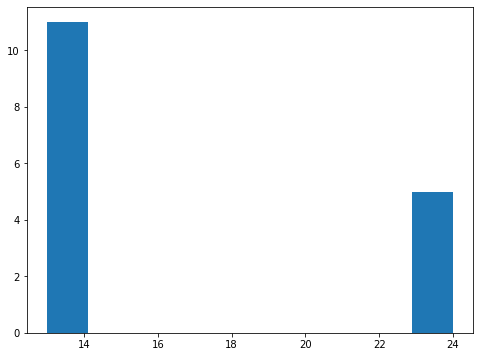

In [55]:
from matplotlib.ticker import FuncFormatter, MaxNLocator

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.hist(koppen_tuol.read(masked=True).flatten())
# ax.xaxis.set_major_formatter(FuncFormatter(format_sturm))
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))

(array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 34.]),
 array([ 6. ,  7.4,  8.8, 10.2, 11.6, 13. , 14.4, 15.8, 17.2, 18.6, 20. ]),
 <a list of 10 Patch objects>)

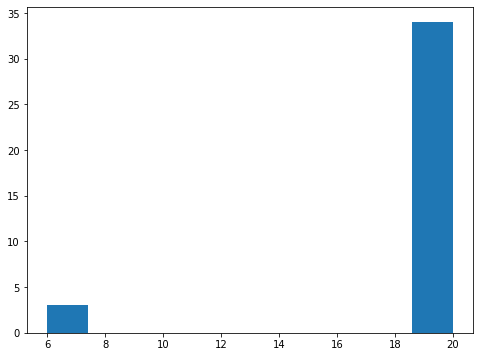

In [56]:
from matplotlib.ticker import FuncFormatter, MaxNLocator

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.hist(koppen_colo.read(masked=True).flatten())
# ax.xaxis.set_major_formatter(FuncFormatter(format_sturm))
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))

Text(0.0, 1.0, 'Köppen – Colorado')

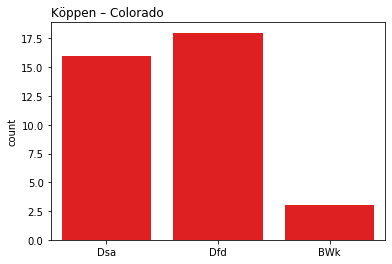

In [75]:
sns.countplot(list(map(lambda x: classes[x], koppen_colo_data + 1)), color='red')
plt.title("Köppen – Colorado", loc='left')

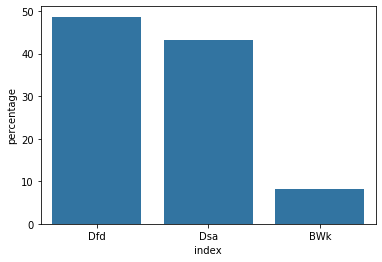

In [141]:
colo_classes = list(map(lambda x: classes[x], koppen_colo_data + 1))
type_counts = pd.Series(colo_classes) \
                .value_counts(normalize=True)\
                .rename('percentage').mul(100)\
                .sort_values(ascending=False)\
                .reset_index()
sns.barplot(x='index', y='percentage', data=type_counts, color=sns.color_palette()[0])

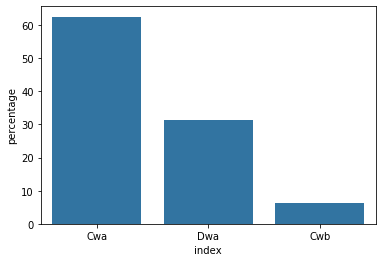

In [143]:
tuol_classes = colo_classes = list(map(lambda x: classes[x], koppen_tuol_data + 1))

type_counts = pd.Series(tuol_classes) \
                .value_counts(normalize=True)\
                .rename('percentage').mul(100)\
                .sort_values(ascending=False)\
                .reset_index()
sns.barplot(x='index', y='percentage', data=type_counts, color=sns.color_palette()[0])

In [136]:
sns.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [69]:
classes[20-1]

'Dfc'

In [65]:
np.map

NameError: name 'np' is not defined